# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

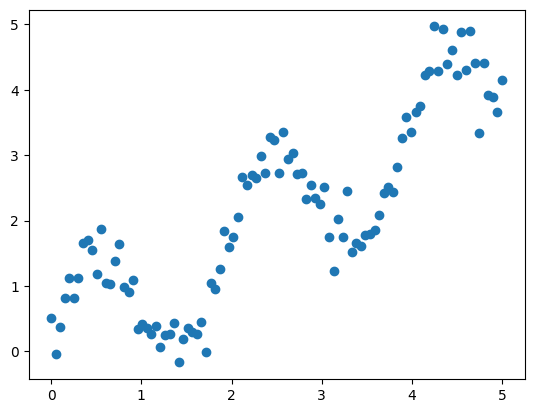

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.6225830233907247


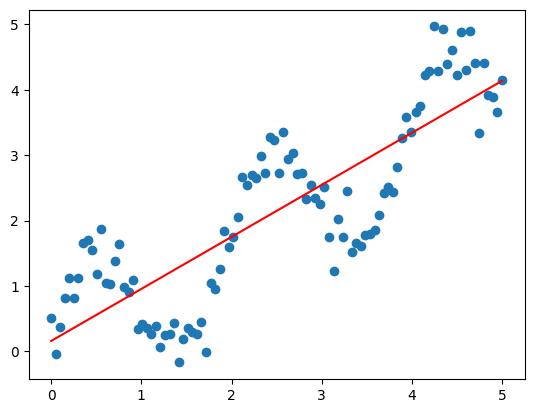

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

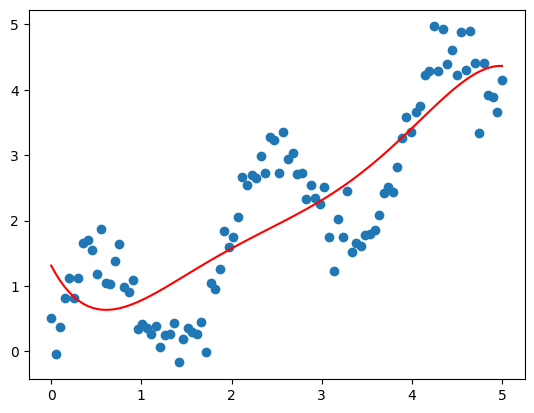

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.64572855  3.30461119 -1.46980082  0.30095882 -0.02262679]
interception:  1.3141127599331535


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.31411276, 1.18873198, 1.07910083, 0.98415261, 0.90286581,
       0.83426324, 0.77741114, 0.7314183 , 0.69543512, 0.66865278,
       0.6503023 , 0.63965367, 0.63601496, 0.63873141, 0.64718456,
       0.66079134, 0.67900318, 0.70130513, 0.72721497, 0.75628228,
       0.78808759, 0.82224148, 0.85838368, 0.89618216, 0.93533228,
       0.97555586, 1.01660032, 1.05823773, 1.10026401, 1.14249794,
       1.18478034, 1.22697314, 1.26895851, 1.31063795, 1.35193139,
       1.39277632, 1.43312691, 1.47295308, 1.51223962, 1.55098531,
       1.58920202, 1.62691383, 1.6641561 , 1.70097463, 1.73742473,
       1.77357033, 1.80948312, 1.84524163, 1.88093032, 1.91663873,
       1.95246058, 1.98849283, 2.02483487, 2.06158754, 2.0988523 ,
       2.13673031, 2.17532157, 2.21472396, 2.25503242, 2.29633802,
       2.33872708, 2.38228028, 2.42707173, 2.47316815, 2.52062792,
       2.56950019, 2.61982404, 2.6716275 , 2.72492675, 2.77972518,
       2.83601248, 2.8937638 , 2.95293881, 3.01348083, 3.07531

In [15]:
regr_poly.predict(X_poly)

array([1.31411276, 1.18873198, 1.07910083, 0.98415261, 0.90286581,
       0.83426324, 0.77741114, 0.7314183 , 0.69543512, 0.66865278,
       0.6503023 , 0.63965367, 0.63601496, 0.63873141, 0.64718456,
       0.66079134, 0.67900318, 0.70130513, 0.72721497, 0.75628228,
       0.78808759, 0.82224148, 0.85838368, 0.89618216, 0.93533228,
       0.97555586, 1.01660032, 1.05823773, 1.10026401, 1.14249794,
       1.18478034, 1.22697314, 1.26895851, 1.31063795, 1.35193139,
       1.39277632, 1.43312691, 1.47295308, 1.51223962, 1.55098531,
       1.58920202, 1.62691383, 1.6641561 , 1.70097463, 1.73742473,
       1.77357033, 1.80948312, 1.84524163, 1.88093032, 1.91663873,
       1.95246058, 1.98849283, 2.02483487, 2.06158754, 2.0988523 ,
       2.13673031, 2.17532157, 2.21472396, 2.25503242, 2.29633802,
       2.33872708, 2.38228028, 2.42707173, 2.47316815, 2.52062792,
       2.56950019, 2.61982404, 2.6716275 , 2.72492675, 2.77972518,
       2.83601248, 2.8937638 , 2.95293881, 3.01348083, 3.07531

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

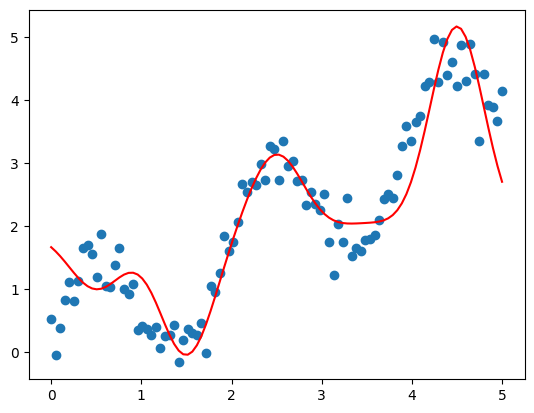

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [25]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.72620466 -1.83462409  1.09615001 -0.01194894  3.09093005]
interception:  1.877906975572715


#### Comparison

In [22]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

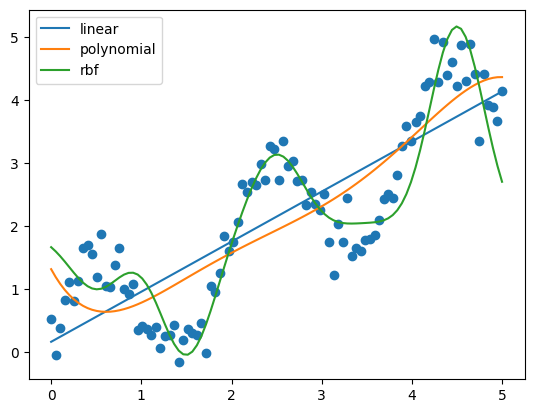

In [23]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [24]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6225830233907247


In [25]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5428201124998445


In [26]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.26463223442159534
